### Linear Regression of Airbnb Room Data

In [10]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import numpy as np
# import statsmodels.formula.api as smf
import pandas as pd

In [2]:
# Read in room data
rooms = pd.read_csv('../data/bogota-clean-10-06-2019--20-16-39.csv')

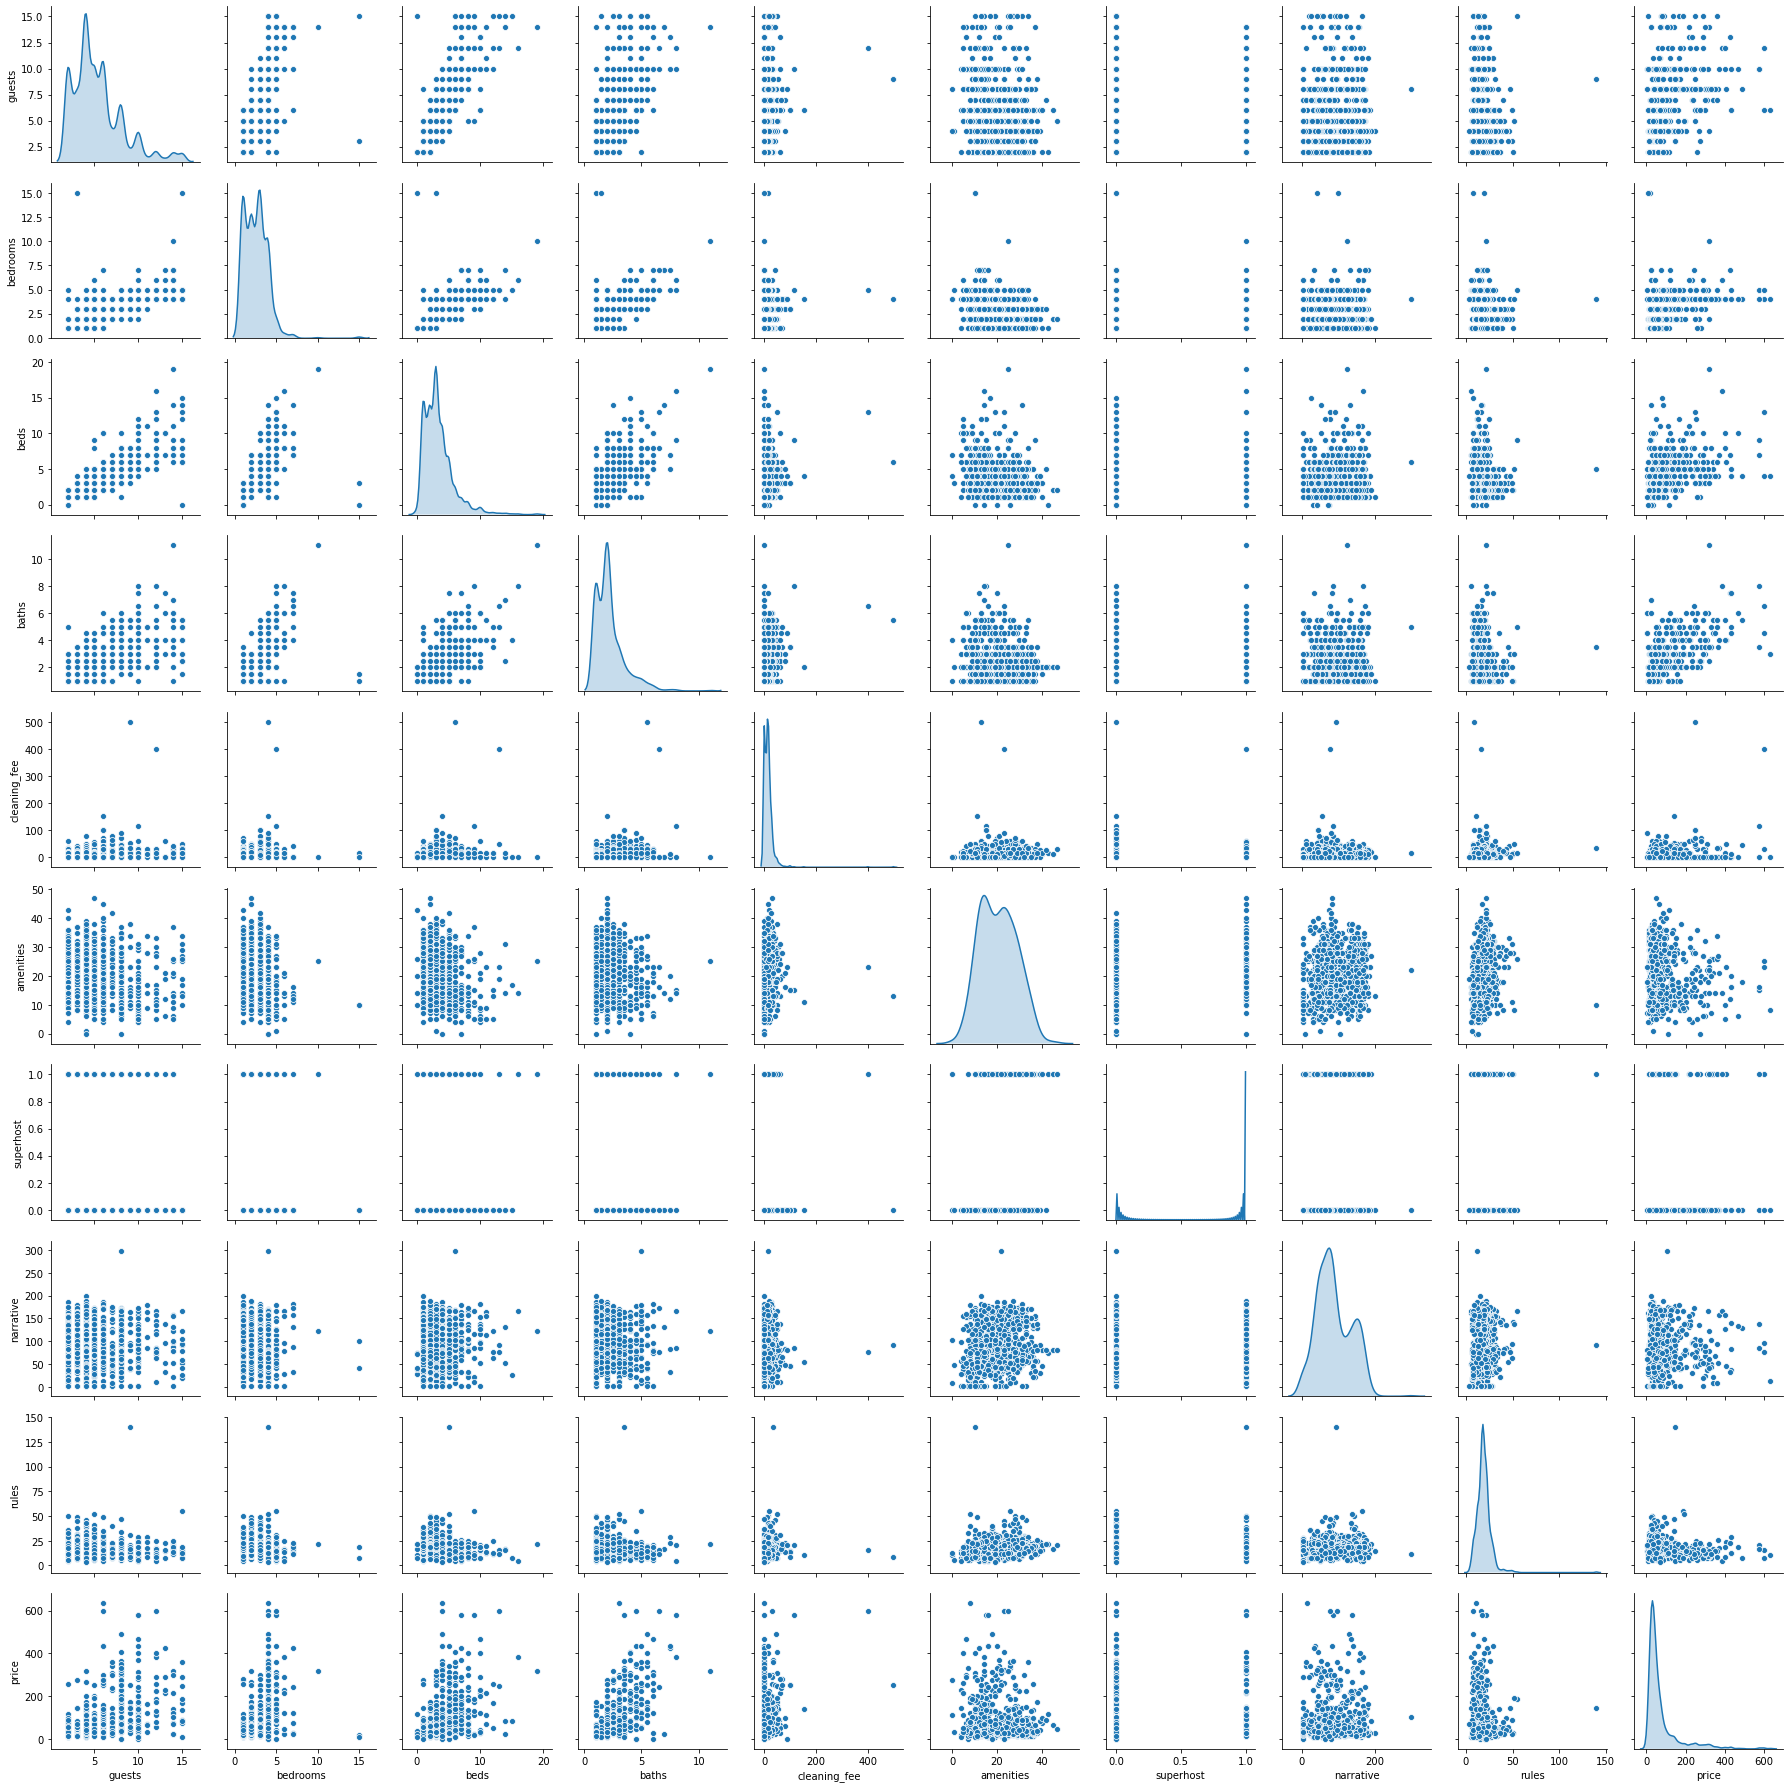

In [3]:
    # Create a pairplot to feature correlations
    sns.pairplot(rooms[['guests', 'bedrooms', 'beds', 'baths', 'cleaning_fee',
            'amenities', 'superhost', 'narrative', 'rules', 'price']], diag_kind='kde')

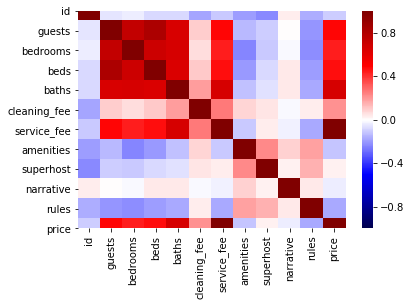

In [5]:
# Heat map of correlations, borrowed from lecture notebook
sns.heatmap(rooms.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

In [6]:
# Set target variable and features array. The target is the price of the room.
y = rooms.price
X = rooms[['guests', 'bedrooms', 'beds', 'baths', 'cleaning_fee',
           'amenities', 'superhost', 'narrative', 'rules']]

In [7]:
# Statsmodels ordinary least squares fit of the data.
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.690
Model:                            OLS   Adj. R-squared (uncentered):              0.687
Method:                 Least Squares   F-statistic:                              213.1
Date:                Tue, 08 Oct 2019   Prob (F-statistic):                   4.24e-212
Time:                        08:34:47   Log-Likelihood:                         -4856.1
No. Observations:                 869   AIC:                                      9730.
Df Residuals:                     860   BIC:                                      9773.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
guests           4.0401      1.503      2.688      0.007       1.090       6.990
bedrooms        -5.1912      2.465     -2.106      0.036     -10.030      -0.353
beds             0.5094      1.778      0.286      0.775      -2.980       3.999
baths           41.8845      2.604     16.084      0.000      36.773      46.996
cleaning_fee     0.3209      0.088      3.664      0.000       0.149       0.493
amenities       -0.6489      0.252     -2.575      0.010      -1.143      -0.154
superhost       17.9173      5.435      3.297      0.001       7.250      28.585
narrative       -0.1024      0.046     -2.246      0.025      -0.192      -0.013
rules           -0.7163      0.248     -2.890      0.004      -1.203      -0.230
==============================================================================
Omnibus:                      442.752   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5159.946
Skew:                           2.035   Prob(JB):                         0.00
Kurtosis:                      14.223   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

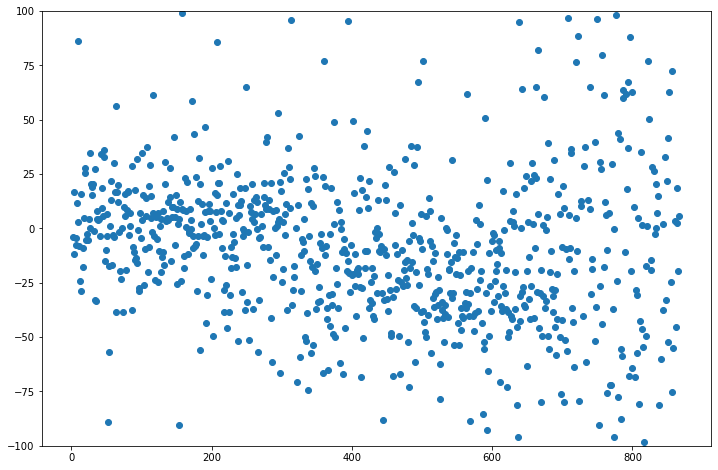

In [15]:
# Plot residuals
plt.figure(figsize=(12,8))
plt.ylim((-100, 100)) 
plt.scatter(np.arange(1, len(y)+1, 1), fit.resid);

In [16]:
lr = LinearRegression()
lr.fit(X, y)
lr.score()

0.4627097663044494